In [0]:
!wget https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/labs/exam/chess.png -O chess.png

--2020-05-13 07:43:08--  https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/labs/exam/chess.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21635 (21K) [image/png]
Saving to: ‘chess.png’

chess.png           100%[===================>]  21.13K  --.-KB/s    in 0.01s   

2020-05-13 07:43:08 (1.60 MB/s) - ‘chess.png’ saved [21635/21635]



In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

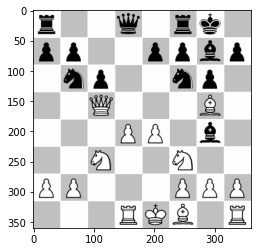

In [0]:
board = cv2.imread("chess.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(board, cmap='gray')
plt.show()

# Cells extraction

In [0]:
def showInRow(list_of_images, titles = None):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
  plt.show()

In [0]:
grey_color = 192
white_color = 254

def replace_color(img, source_color, target_color):
  """
  This function replaces color in image from source to target
  """
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if (img[i][j] == source_color).all():
        new_img[i][j] = target_color
  return new_img

In [0]:
board.shape

(360, 360)

In a cell above we see, that square board image has 360x360 size. Therefore, size of one celll is (360/8-1)x(360/8-1) = 44x44 pixels.

-1 because if you look closely, you'll see that rows/columns connections are not seameless. In fact, there's a thin white line (1 pixel wide) that divides each pair of rows/columns.

## Empty cells

In [0]:
empty_gray = board[0:44, 45+1:45*2]
empty_white = board[0:44, 45*2+1:45*3]

In [0]:
empty_gray.shape

(44, 44)

## Black figures

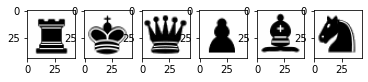

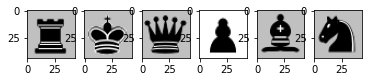

In [0]:
black_rook_white = board[0:44, 0:44]
black_rook_gray = board[0:44, 45*5+1:45*6]

black_queen_gray = board[0:44, 45*3+1:45*4]
black_queen_white = replace_color(black_queen_gray, grey_color, white_color)

black_king_white = board[0:44, 45*6+1:45*7]
black_king_gray = replace_color(black_king_white, white_color, grey_color)

black_pawn_gray = board[45+1:45*2, 0:44]
black_pawn_white = board[45+1:45*2, 45+1:45*2]

black_bishop_gray = board[45+1:45*2, 45*6+1:45*7]
black_bishop_white = board[45*4+1:45*5, 45*6+1:45*7]

black_knight_gray = board[45*2+1:45*3, 45+1:45*2]
black_knight_white = replace_color(black_knight_gray, grey_color, white_color)

black_figs = {
    "rook": {"white": black_rook_white, "gray": black_rook_gray},
    "king": {"white": black_king_white, "gray": black_king_gray},
    "queen": {"white": black_queen_white, "gray": black_queen_gray},
    "pawn": {"white": black_pawn_white, "gray": black_pawn_gray},
    "bishop": {"white": black_bishop_white, "gray": black_bishop_gray},
    "knight": {"white": black_knight_white, "gray": black_knight_gray}
}

showInRow([black_figs[key]["white"] for key in list(black_figs.keys())])
showInRow([black_figs[key]["gray"] for key in list(black_figs.keys())])

In [0]:
# There's something wrong with the display of black pawn on a gray background,
# but you can sheck that it is gray if you print it (192 - gray color)
black_pawn_gray

array([[192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       ...,
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192]], dtype=uint8)

## White figures

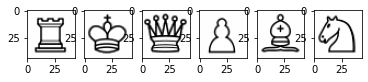

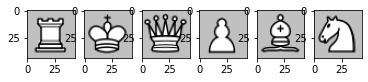

In [0]:
white_rook_white = board[45*7+1:45*8, 45*3+1:45*4]
white_rook_gray = replace_color(white_rook_white, white_color, grey_color)

white_king_gray = board[45*7+1:45*8, 45*4+1:45*5]
white_king_white = replace_color(white_king_gray, grey_color, white_color)

white_queen_gray = board[45*3+1:45*4, 45*2+1:45*3]
white_queen_white = replace_color(white_queen_gray, grey_color, white_color)

white_pawn_gray = board[45*4+1:45*5, 45*3+1:45*4]
white_pawn_white = board[45*4+1:45*5, 45*4+1:45*5]

white_bishop_gray = board[45*3+1:45*4, 45*6+1:45*7]
white_bishop_white = board[45*7+1:45*8, 45*5+1:45*6]

white_knight_gray = board[45*5+1:45*6, 45*2+1:45*3]
white_knight_white = board[45*5+1:45*6, 45*5+1:45*6]

white_figs = {
    "rook": {"white": white_rook_white, "gray": white_rook_gray},
    "king": {"white": white_king_white, "gray": white_king_gray},
    "queen": {"white": white_queen_white, "gray": white_queen_gray},
    "pawn": {"white": white_pawn_white, "gray": white_pawn_gray},
    "bishop": {"white": white_bishop_white, "gray": white_bishop_gray},
    "knight": {"white": white_knight_white, "gray": white_knight_gray}
}

showInRow([white_figs[key]["white"] for key in list(white_figs.keys())])
showInRow([white_figs[key]["gray"] for key in list(white_figs.keys())])

# Image to Notation

## Converting image to notation

In [0]:
row = ["1", "2", "3", "4", "5", "6", "7", "8"]
col = ["a", "b", "c", "d", "e", 'f', "g", "h"]

In [0]:
def count_likeness(pic1, pic2):
  """
  This function count percentage of equal pixels between pic1 and pic2
  """
  count = 0
  for i in range(pic1.shape[0]):
    for j in range(pic1.shape[0]):
      if pic1[i][j] != pic2[i][j]:
        count +=1
  return 1-count/(pic1.shape[0]*pic1.shape[1])

In [0]:
def find_equal(cell, black_figs, white_figs):
  """
  This function searches for figure pic (black/white figure on white/gray background)
  that looks like cell
  """
  keys = list(black_figs.keys())
  for key in keys:
    if count_likeness(cell, black_figs[key]["white"])>0.86 or count_likeness(cell, black_figs[key]["gray"])>0.86:
      return " ".join([key, "black"])
  for key in keys:
    if count_likeness(cell, white_figs[key]["white"])>0.86 or count_likeness(cell, white_figs[key]["gray"])>0.86:
      return " ".join([key, "white"])
  return None

Number 86 was obtained empirically. There are two figures that deviate from others in their group: **black pawn on e7** and **white pawn on a2**.

count_likeness() of black pawn on e7 and other black pawns on gray background is 0.91

count_likeness() of white pawn on a2 and other white pawns on white background is 0.862

Hence the threshold - 0.86

In [0]:
check_list = []
for i in range(0,8):
  for j in range(0,8):
    x_range = (45*j+1, 45*(j+1))
    y_range = (45*i+1, 45*(i+1))

    # we do this because normally range follows formulation above, but edge
    # cells start from 0, not 1
    if i == 0:  
      y_range = (0, 44)
    if j == 0:
      x_range = (0, 44)

    cell = board[y_range[0]:y_range[1], x_range[0]:x_range[1]]

    res = find_equal(cell, black_figs, white_figs)
    if res:
      final_res = "".join([col[j], row[7-i]]) + " " + res
      check_list.append(final_res)
      print(final_res)

a8 rook black
d8 queen black
f8 rook black
g8 king black
a7 pawn black
b7 pawn black
e7 pawn black
f7 pawn black
g7 bishop black
h7 pawn black
b6 knight black
c6 pawn black
f6 knight black
g6 pawn black
c5 queen white
g5 bishop white
d4 pawn white
e4 pawn white
g4 bishop black
c3 knight white
f3 knight white
a2 pawn white
b2 pawn white
f2 pawn white
g2 pawn white
h2 pawn white
d1 rook white
e1 king white
f1 bishop white
h1 rook white


## Testing

In [0]:
# This is handwritten Image->Notation solution
gold = ["a8 rook black",
"d8 queen black",
"f8 rook black",
"g8 king black",
"a7 pawn black",
"b7 pawn black",
"e7 pawn black",
"f7 pawn black",
"g7 bishop black",
"h7 pawn black",
"b6 knight black",
"c6 pawn black",
"f6 knight black",
"g6 pawn black",
"c5 queen white",
"g5 bishop white",
"d4 pawn white",
"e4 pawn white",
"g4 bishop black",
"c3 knight white",
"f3 knight white",
"a2 pawn white",
"b2 pawn white",
"f2 pawn white",
"g2 pawn white",
"h2 pawn white",
"d1 rook white",
"e1 king white",
"f1 bishop white",
"h1 rook white"]

In [0]:
if np.array_equal(check_list, gold):
  print("Solution is correct!")

Solution is correct!


# Notation to Image

## Generating empty board

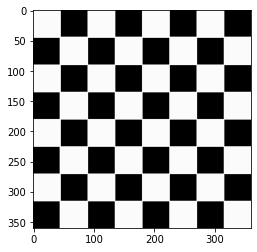

In [0]:
gen_board = np.full(board.shape, 255)
for i in range(0,8):
  for j in range(0,8):
    x_range = (45*j+1, 45*(j+1))
    y_range = (45*i+1, 45*(i+1))

    # we do this because normally range follows formulation above, but edge
    # cells start from 0, not 1
    if i == 0:  
      y_range = (0, 44)
    if j == 0:
      x_range = (0, 44)

    if (i+j)%2 == 0:
      gen_board[y_range[0]:y_range[1], x_range[0]:x_range[1]] = empty_white
    if (i+j)%2 == 1:
      gen_board[y_range[0]:y_range[1], x_range[0]:x_range[1]] = empty_gray

plt.imshow(gen_board, cmap='gray')
plt.show()

# again, the board is displayed as b/w, but in fact it is gray/white

## Filling epty board with figures

In [0]:
notation = ["c6 king black",
"c5 queen white",
"d4 pawn black",
"e4 bishop white",
"h1 rook black"
]

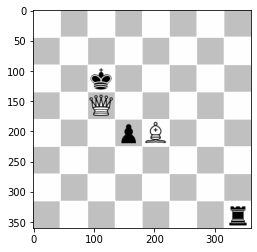

In [0]:
for line in notation:
  args = line.split()
  c = col.index(args[0][0])
  r = 7-row.index(args[0][1])
  fig = args[1]
  clr = args[2]

  # We start by selecting the color of the figure
  if clr == "white":
    # and then we select color of backgroud
    if (r+c)%2 == 0:
      fig_pic = white_figs[fig]['white']
    elif (r+c)%2 == 1:
      fig_pic = white_figs[fig]['gray']
  elif clr == "black":
    if (r+c)%2 == 0:
      fig_pic = black_figs[fig]['white']
    elif (r+c)%2 == 1:
      fig_pic = black_figs[fig]['gray']

  x_range = (45*c+1, 45*(c+1))
  y_range = (45*r+1, 45*(r+1))

  # we do this because normally range follows formulation above, but edge
  # cells start from 0, not 1
  if r == 0:  
    y_range = (0, 44)
  if c == 0:
    x_range = (0, 44)

  gen_board[y_range[0]:y_range[1], x_range[0]:x_range[1]] = fig_pic

plt.imshow(gen_board, cmap='gray')
plt.show()